# 第 3 章　使用 Pyhton 进行数据分析｜用 Python 动手学统计学

## 第 5 节　样本统计量的性质

### 3. 导入所需的库

In [1]:
# 用于数值计算的库
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 用于绘图的库
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 设置浮点数打印精度
%precision 3
# 在 Jupyter Notebook 里显示图形
%matplotlib inline

In [2]:
# 总体服从均值为 4 标准差为 0.8 的正态分布
population = stats.norm(loc = 4, scale = 0.8)

### 4. 多次计算样本均值

In [3]:
# 存放均值的容器
sample_mean_array = np.zeros(10000)

In [5]:
# 抽取 10 个数据并计算均值, 此操作重复 10,000 次
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    sample_mean_array[i] = sp.mean(sample)

In [6]:
sample_mean_array

array([ 3.922,  3.864,  4.07 , ...,  4.136,  4.575,  4.099])

### 5. 样本均值的均值与总体均值相近

In [7]:
# 样本均值的均值
sp.mean(sample_mean_array)

4.004

In [8]:
# 样本均值的标准差
sp.std(sample_mean_array, ddof = 1)

0.251

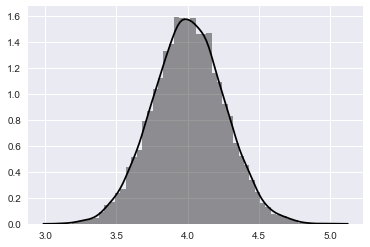

In [9]:
# 样本均值的样本分布
sns.distplot(sample_mean_array, color = 'black')

### 6. 样本容量越大，样本均值越接近总体均值

In [10]:
# 公差是 100 的样本容量, 范围是 10 到 100,010
size_array =  np.arange(
    start = 10, stop = 100100, step = 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [11]:
# 存放样本均值的容器
sample_mean_array_size = np.zeros(len(size_array))

In [12]:
# 改变样本容量的同时计算样本均值
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    sample_mean_array_size[i] = sp.mean(sample)

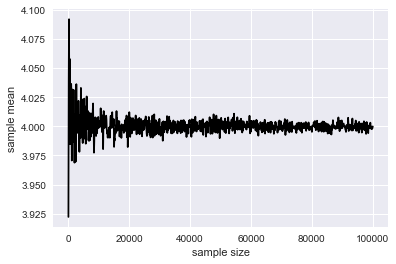

In [13]:
plt.plot(size_array, sample_mean_array_size, 
         color = 'black')
plt.xlabel("sample size")
plt.ylabel("sample mean")

### 7. 定义用于计算样本均值的函数

In [14]:
# 用于计算样本均值的函数
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size = size)
        sample_mean_array[i] = sp.mean(sample)
    return(sample_mean_array)

In [15]:
# 验证函数功能
# 抽取 10 个数据并计算均值, 此操作重复 10,000 次, 再求这 10,000 个结果的均值
np.random.seed(1)
sp.mean(calc_sample_mean(size = 10, n_trial = 10000))

4.004

### 8. 不同样本容量所得的样本均值的分布

In [17]:
np.random.seed(1)
# 样本容量 10
size_10 = calc_sample_mean(size = 10, n_trial = 10000)
size_10_df = pd.DataFrame({
    "sample_mean":size_10,
    "size"       :np.tile("size 10", 10000)
})
# 样本容量 20
size_20 = calc_sample_mean(size = 20, n_trial = 10000)
size_20_df = pd.DataFrame({
    "sample_mean":size_20,
    "size"       :np.tile("size 20", 10000)
})
# 样本容量 30
size_30 = calc_sample_mean(size = 30, n_trial = 10000)
size_30_df = pd.DataFrame({
    "sample_mean":size_30,
    "size"       :np.tile("size 30", 10000)
})

# 拼接表格
sim_result = pd.concat(
    [size_10_df, size_20_df, size_30_df])

# 打印结果
print(sim_result.head())

   sample_mean     size
0     3.922287  size 10
1     3.864329  size 10
2     4.069530  size 10
3     3.857140  size 10
4     4.184654  size 10


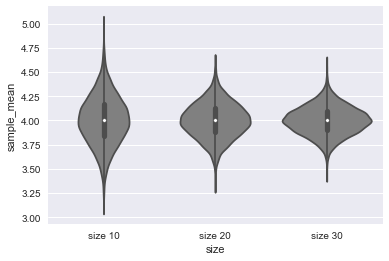

In [18]:
sns.violinplot(x = "size", y = "sample_mean", 
               data = sim_result, color = 'gray')

### 9. 样本均值的标准差小于总体标准差

In [20]:
# 公差为 2 的样本容量, 范围是 2 到 100
size_array =  np.arange(
    start = 2, stop = 102, step = 2)
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [21]:
# 存放样本均值的标准差的容器
sample_mean_std_array = np.zeros(len(size_array))

In [23]:
# 改变样本容量的同时计算样本均值的标准差
np.random.seed(1)
for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(size =size_array[i], 
                                   n_trial = 100)
    sample_mean_std_array[i] = sp.std(sample_mean, 
                                      ddof = 1)

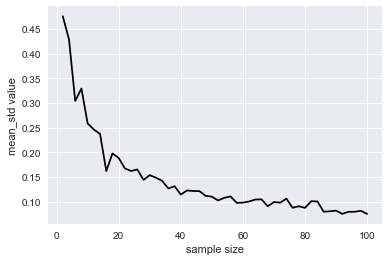

In [24]:
plt.plot(size_array, sample_mean_std_array, 
         color = 'black')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

### 10. 标准误差

In [25]:
# 样本均值的标准差的理论值：标准误差
standard_error = 0.8 / np.sqrt(size_array)
standard_error

array([ 0.566,  0.4  ,  0.327,  0.283,  0.253,  0.231,  0.214,  0.2  ,
        0.189,  0.179,  0.171,  0.163,  0.157,  0.151,  0.146,  0.141,
        0.137,  0.133,  0.13 ,  0.126,  0.123,  0.121,  0.118,  0.115,
        0.113,  0.111,  0.109,  0.107,  0.105,  0.103,  0.102,  0.1  ,
        0.098,  0.097,  0.096,  0.094,  0.093,  0.092,  0.091,  0.089,
        0.088,  0.087,  0.086,  0.085,  0.084,  0.083,  0.083,  0.082,
        0.081,  0.08 ])

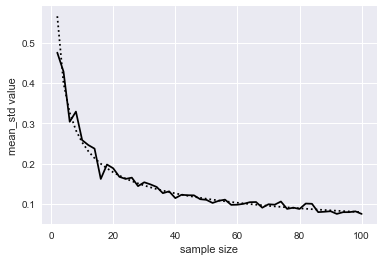

In [26]:
plt.plot(size_array, sample_mean_std_array, 
         color = 'black')
plt.plot(size_array, standard_error, 
         color = 'black', linestyle = 'dotted')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

### 12. 样本方差的均值偏离于总体方差

In [27]:
# 存放方差值的容器
sample_var_array = np.zeros(10000)

In [28]:
# 取出 10 个数据并求其方差, 执行 10,000 次
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    sample_var_array[i] = sp.var(sample, ddof = 0)

In [29]:
# 样本方差的均值
sp.mean(sample_var_array)

0.575

### 13. 采用无偏方差消除偏离

In [33]:
# 存放无偏方差的空间
unbias_var_array = np.zeros(10000)
# 进行 10,000 次计算10个数据的无偏方差操作
# 
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    unbias_var_array[i] = sp.var(sample, ddof = 1)
# 无偏方差的均值
sp.mean(unbias_var_array)

0.639

### 14. 样本容量越大，其无偏方差越接近总体方差

In [34]:
# 公差为 100 的样本容量, 范围是 10 到 100,010
size_array =  np.arange(
    start = 10, stop = 100100, step = 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [35]:
# 存放无偏方差的容器
unbias_var_array_size = np.zeros(len(size_array))

In [36]:
# 在样本容量变化的同时反复计算样本的无偏方差
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    unbias_var_array_size[i] = sp.var(sample, ddof = 1)

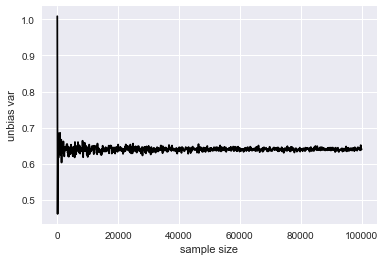

In [37]:
plt.plot(size_array, unbias_var_array_size, 
         color = 'black')
plt.xlabel("sample size")
plt.ylabel("unbias var")

### 19. 补充：中心极限定理

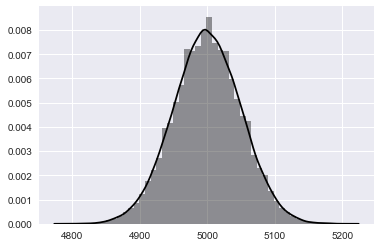

In [40]:
# 样本容量与试验次数
n_size  = 10000
n_trial = 50000
# 正面为 1, 背面为 0
coin = np.array([0,1])
# 出现正面的次数
count_coin = np.zeros(n_trial)
# 投 n_size 次硬币, 此实验进行 n_trial 次
np.random.seed(1)
for i in range(0, n_trial):
    count_coin[i] = sp.sum(
        np.random.choice(coin, size = n_size, 
                         replace = True))
# 绘出直方图
sns.distplot(count_coin, color = 'black')